## Language Model - next word prediction model
- 이전 time step의 output을 next time step의 input으로 feed하고, 각 step에서 가장 높은 확률의 다음 단어를 선택 (greedy selection)하거나 혹은 확률 분포에 따라 sampling
- 적용 분야
    - Machine Translation
    - Question Answering
    - Chatbot
    - Speech REcognition
    - Text Summarization
    - Image Captioning
    - etc...
### Seq2Seq Language Translation (기계번역)
- 언어에 상관없이 동일한 모델 적용 가능
    - encoder-decoder model은 활요도가 매우 높은 중요한 기술
- 질의 응답 문제 (story + question --> answer)에도 적용 가능
    - story + question : input sequence --> thought vector encoding
    - answer : output sequence --> thought vector decoding
#### BLEU (Bilingual Evaluation Understudy)
: 기계 번역의 품질을 평가하는 알고리즘
- 언어에 무관하며 이해하기 쉽고 계산하기 쉽다
- [0,1] 사이의 값 - the higher the score, the better quality
- Score계산 법 - Unigram or bigram
    - the weather is extremely good --> the weather is good
    - (the, weahter)(weather is)(is extremely)(extremely good)
    - (the weather)(weather is)(is good)
    - ==> BLEU = 1/3 + 1/3 + 0/3 = 0.66
### Teacher Forcing (교사학습)
- 첫번째 단어에서 잘못된 예측을 했을 경우 시간이 지날수록 더 큰 잘못된 예측을 할 가능성이 증가. 이에 따라 문장(시퀀스)의 구성이 바뀔 뿐만 아니라, 예측 문장(시퀀스)의 길마저 바뀜
- 학습과정에서는 이미 정답을 알고 있고 현재 모델의 예측값과 정답과의 차이를 통해 학습하므로, 다음 단어 예측의 입력값으로 사용.
- 이전 time step의 output을 input으로 사용
- 한번에 전체 문장을 맞추는 것을 힘드므로 단어 단위로 교사가 교정해 주듯 전체 문장 완성
### Encode-Decode model
- 전통적 기계번역 --> 구문 단위로 분리하여 번역
- Encoder-Decoder model --> 문장 전체를 읽고 의미를 이해한 다음 번역, 인간의 방식과 유사
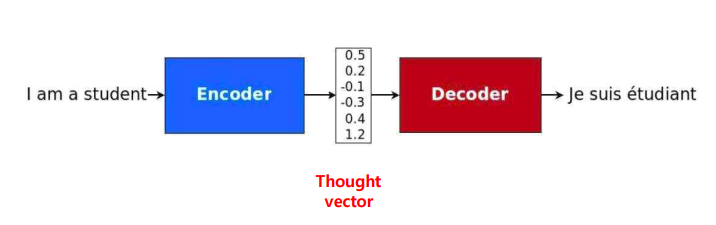
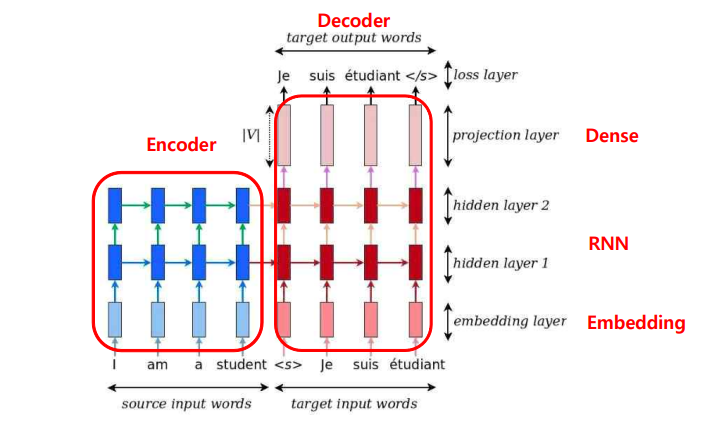
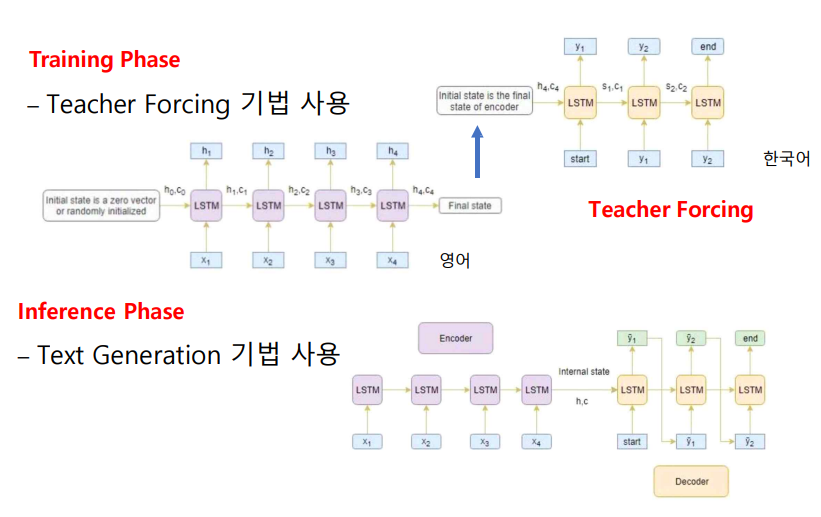
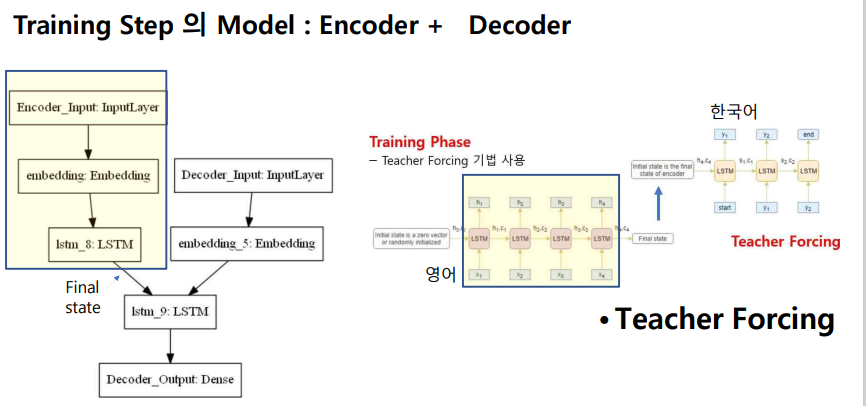

## 딥러닝 기반 자연어 처리 모델
### 기계의 자연어 처리
- 입력 - 사람의 말
- 모델 : 입력을 받아 어떤 처리를 수행하는 함수(function)
- 출력 - 확률(probability) : 0과 1 사이의 값
- 딥러닝 : 데이터 패턴을 스스로 익히는 인공지능의 한 갈래
    - 이미지 분류, 음성 인식 및 합성, 자연어 처리 등 다양한 분야에서 쓰임
    - 자연어 처리 모델 중 BERT나 GPT등이 특히 주목 받고 있다
- 예, 자연어(문장)을 *입력* 받아 복잡한 내부 계산 과정을 거쳐서 해당 문장이 긍정, 부정, 중립일 확률[0.0, 0.3, 0.7]을 *출력* --> 출력된 확률을 후처리(post processing)해서 자연어 형태('중랍')로 바꿈

### 딥러닝 모델의 학습
- 학습 데이터를 준비 : 레이블을 달아 놓은 자료
- 학습 : 모델이 입력과 출력 상의 데이터 패턴을 스스로 익히게 하는 과정
- * 트랜스퍼 러닝 : 특정 테스크를 학습한 모델을 다른 테스크에 *재사용* 하는 기법
- * 업스트림 테스크 : 대규모 말뭉치의 문맥으 이해하는 과제 
    - 예, 다음 단어 맞추기, 빈칸 채우기 등
- * 다운스트림 테스크 : 우리가 풀고자하는 자연어 처리의 구체적 문제들
    - 예, 문서 분류, 개체명 인식 등
- Pretrian : 업스트림 테스크를 학습하는 과정. 다운스트림 테스크를 수행하기 앞서 학습한다는 의미로 이해

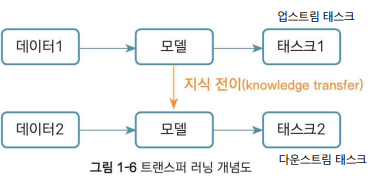


### 업스트림 테스크
언어 모델 : 해당 언어의 풍부한 문맥을 이해할 수 있도록, 업스트림 테스크를 수행한 모델
#### GPT계열 모델 : 다음 단어 맞추기
- 분류해야할 범주의 수가 학습 대상= 언어의 어휘 수 (보통 수만개 이상)만큼 늘어남
- 티끌 모아 다음 단어의 정답이 태산이라면 *태산* 이라는 단어가 나올 확률은 높이고, 나머지 단어들의 확률을 낮추는 방향으로 모델 전체를 업데이트
#### BERT계열 모델 : 빈칸 맞추기
- 앞뒤 문맥을 보고 빈칸에 적합한 단어를 알 수 있음
- 빈칸의 정답이 모아라면 *모아*라는 단어에 해당하는 확률은 높이고 나머지 단어와 과계된 확률은 낮추는 방향으로 모델 전체를 업데이트함
- **마스크 언어 모델** : 빈칸 채우기로 업스트림 테스크를 수행한 모델

#### 지도 학습
- 사람이 만든 정답 데이터로 모델을 학습하는 방법
- 데이터를 만드는데 비용이 많이 들뿐만 아니라 사람이 실수로 잘못된 레이블을 줄 수 도 있음. 
#### 자기지도 학습
- 데이터 내에서 정답을 만들고 이를 바탕으로 학습하는 방법
- 빈칸 채우기 같은 없스트림 테스크는 강력한 힘을 지님
- 뉴스, 웹문서, 백과사전 등 글만 있으면 수작업 없이도 다량의 학습 데이터를 아주 싼 값에 만들어 낼 수 있음

### 다운스트림 테스크
- 우리가 풀어야 할 자연어 처리의 구체적인 과제들
- 보통 프리 트레인을 마친 모델을 구조 변경 없이 그대로 사용하거나 여기에 모듈을 덧붙인 형태로 수행
#### 분류 : 다운스트림 테스크의 본질
- 입력이 어떤 범주에 해당하는 지 확률 형태로 반환
- 문장 생성을 제외한 대부분의 과제에서는 pretrain을 마친 마스크 언어 모델( BERT 계열)사용
#### 파인튜닝
- pretrain을 마친 모델을 다운스트림 테스크에 마제 업데이트!

### 전이학습 : 이미 학습된 neural network의 파라미터르르 새로운 테스크에 맞게 다시 미세조정(fine tuning)하는 것
- 컴퓨터 비전 문제에서는 ImageNet등의 데이터셋에 미리 pre-training시키고 이 파라미터들을 내가 풀고자하는 문제에 맞에 fine-tuning하는 과정이 광범위하게 사용되고 있다.
- 최근에는 BERT, GPT같은 대규모 자연어 처리 모델이 등장함녀서 자연어 처리 ㅁ누제 영역에서도 전이 학습의 개념이 광범위하게 사용된다
